In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### Directed graphs

We'll run our algorithms on directed grapsh though many of these algorithms work on undirected graphs as well

In [3]:
D = nx.DiGraph()

D

In [4]:
D.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])

D.nodes, D.edges

(NodeView(('A', 'B', 'C', 'D', 'E', 'F')), OutEdgeView([]))

In [11]:
D.add_edge('A', 'B')
D.add_edge('B', 'A')
D.add_edge('A', 'C')
D.add_edge('B', 'C')
D.add_edge('D', 'C')
D.add_edge('C', 'E')
D.add_edge('E', 'B')
D.add_edge('B', 'E')
D.add_edge('E', 'F')
D.add_edge('F', 'A')

D.nodes, D.edges

(NodeView(('A', 'B', 'C', 'D', 'E', 'F')),
 OutEdgeView([('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'C'), ('B', 'E'), ('C', 'E'), ('D', 'C'), ('E', 'B'), ('E', 'F'), ('F', 'A')]))

In [9]:
def plot_graph(G, node_color, edge_color):
    
    plt.subplots(figsize=(8, 8))
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")

    options = {
        "font_size": 24,
        "with_labels": True,
        "node_size": 1500,
        "node_color": node_color,
        "edgecolors": edge_color,
        "linewidths": 5,
        "width": 5,
    }

    nx.draw_shell(G, **options)

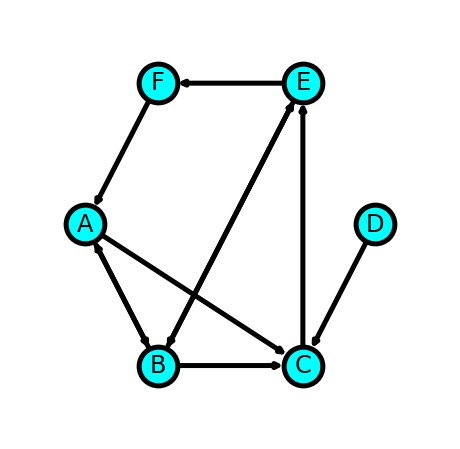

In [10]:
plot_graph(D, "cyan", "black")

In [20]:
U = D.to_undirected()

U.nodes, U.edges

(NodeView(('A', 'B', 'C', 'D', 'E', 'F')),
 EdgeView([('A', 'B'), ('A', 'C'), ('A', 'F'), ('B', 'C'), ('B', 'E'), ('C', 'E'), ('C', 'D'), ('E', 'F')]))

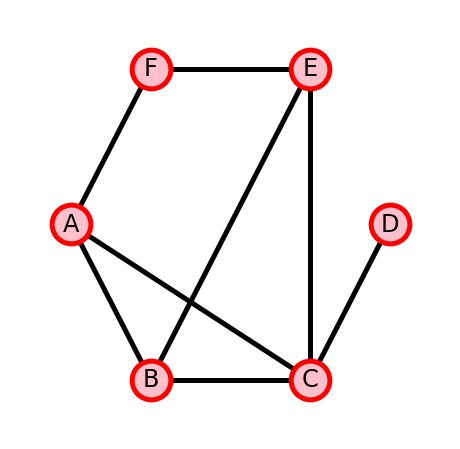

In [22]:
plot_graph(U, "pink", "red")

### Cycles in graphs

Find simple cycles (elementary circuits) of a directed graph.

A simple cycle, or elementary circuit, is a closed path where no node appears twice. Two elementary circuits are distinct if they are not cyclic permutations of each other.

This is a nonrecursive, iterator/generator version of Johnson’s algorithm 1. There may be better algorithms for some cases 2 3.

In [12]:
nx.simple_cycles(D)

<generator object simple_cycles at 0x1240bdcf0>

In [14]:
list(nx.simple_cycles(D))

[['A', 'C', 'E', 'F'],
 ['A', 'C', 'E', 'B'],
 ['A', 'B', 'E', 'F'],
 ['A', 'B', 'C', 'E', 'F'],
 ['A', 'B'],
 ['E', 'B'],
 ['E', 'B', 'C']]

In [23]:
list(nx.simple_cycles(U))

NetworkXNotImplemented: not implemented for undirected type

### Computing triangles

Compute the number of triangles.

Finds the number of triangles that include a node as one vertex.

This is implemented only for the undirected graph and not the directed graph. This prints out the number of triangles which includes every node of the graph.

There is 1 triangle which includes the node A, there are 2 triangles which include the node B and so on

In [25]:
print(nx.triangles(U))

{'A': 1, 'B': 2, 'C': 2, 'D': 0, 'E': 1, 'F': 0}


### Minimum edge cover

An edge cover of a graph is a set of edges such that every node of the graph is incident to at least one edge of the set. The minimum edge cover is an edge covering of smallest cardinality.

This is not implemented for a directed graph

In [32]:
nx.min_edge_cover(U)

{('A', 'B'), ('C', 'D'), ('E', 'F')}

## Directed Acyclic Graphs



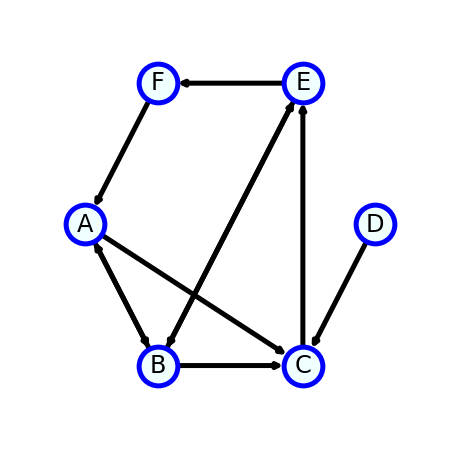

In [33]:
plot_graph(D, "azure", "blue")

In [35]:
list(nx.simple_cycles(D))

[['A', 'C', 'E', 'F'],
 ['A', 'C', 'E', 'B'],
 ['A', 'B', 'E', 'F'],
 ['A', 'B', 'C', 'E', 'F'],
 ['A', 'B'],
 ['E', 'B'],
 ['E', 'B', 'C']]

In [36]:
D.remove_edge('A', 'B')

list(nx.simple_cycles(D))

[['A', 'C', 'E', 'F'], ['A', 'C', 'E', 'B'], ['E', 'B'], ['E', 'B', 'C']]

In [37]:
D.remove_edge('E', 'B')

list(nx.simple_cycles(D))

[['F', 'A', 'C', 'E']]

In [38]:
D.remove_edge('C', 'E')

list(nx.simple_cycles(D))

[]

We now have a directed-acyclic graph

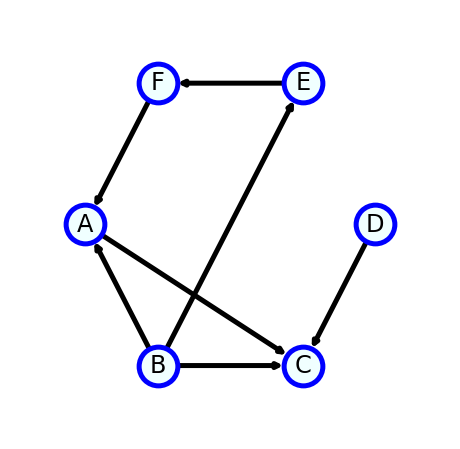

In [39]:
plot_graph(D, "azure", "blue")

In [45]:
nx.is_directed_acyclic_graph(D)

True

Imagine that this graph represents the order in which tasks have to be performed to complete a job. 

- A has to be completed before C
- B has to be completed before A

Ancestors tell us what tasks have to be completed before the task that we have specified

In [46]:
nx.ancestors(D, source='E')

{'B'}

In [47]:
nx.ancestors(D, source='A')

{'B', 'E', 'F'}

In [48]:
nx.ancestors(D, source='C')

{'A', 'B', 'D', 'E', 'F'}

Descendents tell us what tasks depend on a particular task

What tasks can be completed once a certain task that we have specified is complete

In [53]:
nx.descendants(D, source='A')

{'C'}

In [54]:
nx.descendants(D, source='C')

set()

In [56]:
nx.descendants(D, source='E')

{'A', 'C', 'F'}

### Topological sort

A topological sort is a nonunique permutation of the nodes such that an edge from u to v implies that u appears before v in the topological sort order.

This will give us the order in which the tasks can be performed. 

Topological sort is not possible for a graph which has cycles

In [59]:
list(nx.topological_sort(D))

['D', 'B', 'E', 'F', 'A', 'C']

In [60]:
list(nx.all_topological_sorts(D))

[['D', 'B', 'E', 'F', 'A', 'C'],
 ['B', 'E', 'F', 'A', 'D', 'C'],
 ['B', 'E', 'F', 'D', 'A', 'C'],
 ['B', 'E', 'D', 'F', 'A', 'C'],
 ['B', 'D', 'E', 'F', 'A', 'C']]

Returns the longest path in a directed acyclic graph (DAG).

In [70]:
nx.dag_longest_path(D)

['B', 'E', 'F', 'A', 'C']

### Shortest paths

These algorithms work on directed as well as undirected graphs

The default shortest-path algorithm used is Dijkstra's algorithm

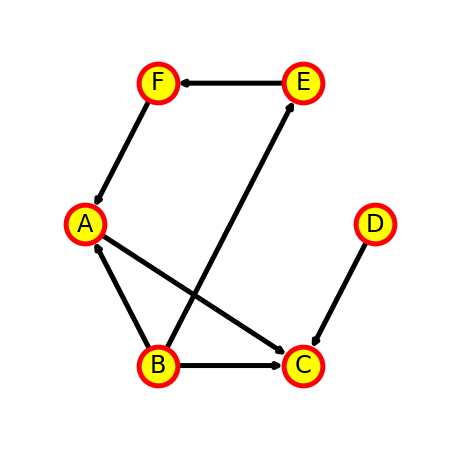

In [71]:
plot_graph(D, "yellow", "red")

In [77]:
nx.shortest_path(D, source='B', target='F')

['B', 'E', 'F']

In [78]:
nx.shortest_path(D, source='E', target='C')

['E', 'F', 'A', 'C']

In [79]:
nx.shortest_path(D, source='B', target='A')

['B', 'A']

No path exists from D to F

In [80]:
nx.shortest_path(D, source='D', target='F')

NetworkXNoPath: No path between D and F.

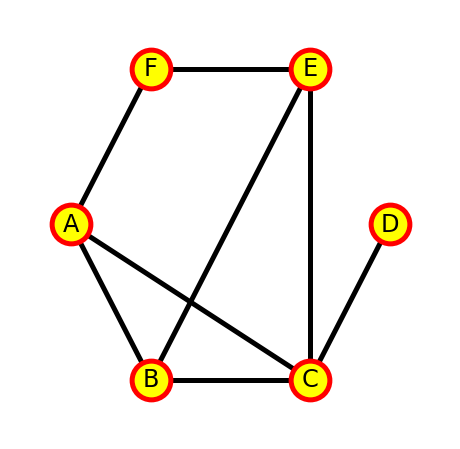

In [81]:
plot_graph(U, "yellow", "red")

In [83]:
nx.shortest_path(U, source='A', target='D')

['A', 'C', 'D']

In [84]:
nx.shortest_path(U, source='D', target='A')

['D', 'C', 'A']

In [85]:
nx.shortest_path(U, source='B', target='F')

['B', 'E', 'F']

### Weighted graphs

- Use the weights to compute the shortest path
- The default weight of each edge is considered to be 1

In [110]:
U.edges['A', 'C']['weight'] = 10
U.edges['A', 'F']['weight'] = 13

for data in U.edges.data():
    print(data)

('A', 'B', {})
('A', 'C', {'weight': 10})
('A', 'F', {'weight': 13})
('B', 'C', {})
('B', 'E', {'weight': 1})
('C', 'E', {})
('C', 'D', {})
('E', 'F', {})


In [111]:
nx.shortest_path(U, source='A', target='D')

['A', 'C', 'D']

In [112]:
nx.shortest_path(U, source='A', target='D', weight='weight')

['A', 'B', 'C', 'D']

In [113]:
nx.shortest_path(U, source='A', target='C')

['A', 'C']

In [114]:
nx.shortest_path(U, source='A', target='C', weight='weight')

['A', 'B', 'C']

In [115]:
nx.shortest_path(U, source='B', target='E')

['B', 'E']

In [116]:
nx.shortest_path(U, source='B', target='E', weight='weight')

['B', 'E']

Shortest paths to all nodes from B

In [107]:
nx.shortest_path(U, source='B')

{'B': ['B'],
 'A': ['B', 'A'],
 'C': ['B', 'C'],
 'E': ['B', 'E'],
 'F': ['B', 'A', 'F'],
 'D': ['B', 'C', 'D']}

In [108]:
nx.shortest_path(U, source='B', weight='weight')

{'B': ['B'],
 'A': ['B', 'A'],
 'C': ['B', 'C'],
 'E': ['B', 'C', 'E'],
 'F': ['B', 'C', 'E', 'F'],
 'D': ['B', 'C', 'D']}

In [109]:
nx.shortest_path_length(U, source='B', weight='weight')

{'B': 0, 'A': 1, 'C': 1, 'E': 2, 'D': 2, 'F': 3}

### Minimum spanning tree

A minimum spanning tree (MST) or minimum weight spanning tree is a subset of the edges of a connected, edge-weighted undirected graph that connects all the vertices together, without any cycles and with the minimum possible total edge weight. That is, it is a spanning tree whose sum of edge weights is as small as possible.

In other words the minimum spanning tree is the cheapest way to connect all nodes in an undirected graph.

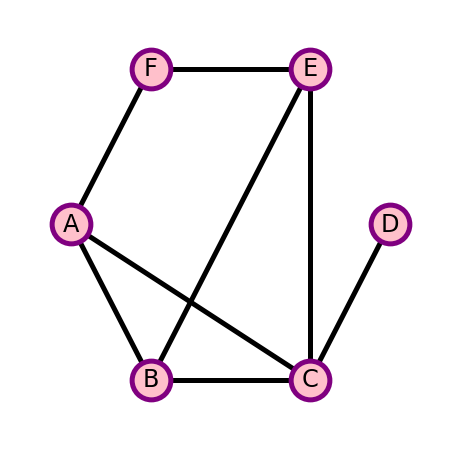

In [118]:
plot_graph(U, "pink", "purple")

In [120]:
MU = nx.minimum_spanning_tree(U)

MU

### Weighted graph

Some of the edges here are weighted

- U.edges['A', 'C']['weight'] = 10
- U.edges['A', 'F']['weight'] = 13

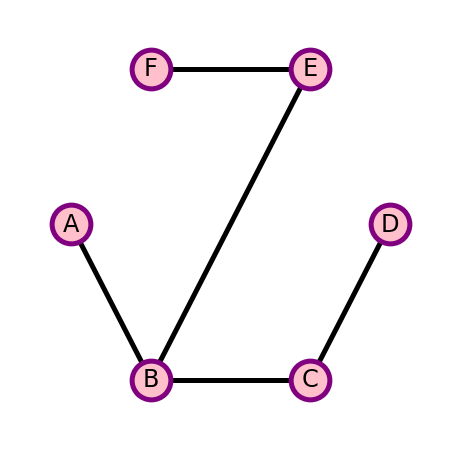

In [121]:
plot_graph(MU, "pink", "purple")

Resetting the weights to 1

In [124]:
U.edges['A', 'C']['weight'] = 1
U.edges['A', 'F']['weight'] = 1

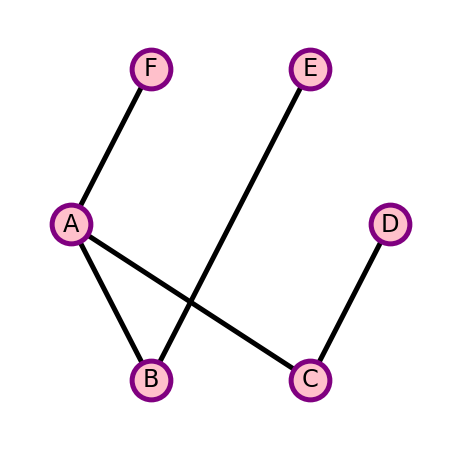

In [125]:
MU = nx.minimum_spanning_tree(U)

plot_graph(MU, "pink", "purple")